![MLU Logo](https://drive.corp.amazon.com/view/bwernes@/MLU_Logo.png?download=true)

# Reinforcement Learning
# Assignment 5 with Solution
## Introduction
Welcome to the fifth RL assignment.  This week, we'll dive into Multi-Armed Bandits and how they're used to solve problems in experimentation.  The main issue is that when you run an experiment you don't want to serve poor performing treatments longer than necessary.  **Multi-Armed Bandits** is a framework solution to this.

## Resources
I've always found experience the best teacher, so I advocate just diving in and trying to implement things.  However, it is always good to have other sources to reference, so every week I'll place links to things that I think are helpful to learn the material.
* [Chapter 2 of this book](http://incompleteideas.net/book/bookdraft2018jan1.pdf) about Multi-armed Bandits is nice.

### Working with Python Classes and Objects
As you have already realized, for Reinforcement Learning, agents have central roles.
For this assignment, you will be working with different agent types and Python has an elegant way to deal with objects like our agent.
Classes and objects in python are powerful tools. 

**But Don't be ecared**: You don't need to know about classes and objects to solve this assignment. Most of the code will be ready for you. 

Nevertheless, if you are curious and want to know better about the subject, I recommend that you spend some time running this quick tutorial [https://www.programiz.com/python-programming/class] as a way to get familiar with the Class concept and explore the assignment code.

### The Problem
You are responsible for the creation of a recommendation system where the customer will be offered with different movie genres and you need to predict which ones will have more likelihood to be accepted.
You've decided that a reinforcement learning model would be a good approach, in a scenario of unique decision making, where the feedback information is useful as a feedback signal (reward) for a stateless bandits-like RL algorithm.

### The Solution: Multi-Armed Bandits
In this unique decision make scenario, the feedback information is used to reinforce our algorithm learning in a stateless approach, bandits-like.
A simple way to model this is considering a +1 reward when the recommendation is accepted by the customer, 0 when it is ignored. 

We could penalize the recommender agent if the customer decides that they don't want to receive certain types of recommendations, but this is a much more complex problem to generalize and we will keep it out of the scope of this assignment.

You are going to help build different agents, each one applying different approaches of action choices and comparing the way they learn based on experience.


### Using an Environment
RL, and especially Multi-Armed Bandits (MABs), depends on an environment. MABs learn by trying different possibilities, seeing the results, then using that new information to inform the next decision. So when testing and trying different models, we need to simulate an environment.<br/>
We are going to create a class for our environment, called **Bandits Problem**, that will have a funtion **execute** to simulate a customer responding to our offer (acception or not accepting the offer).

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

Populating the interactive namespace from numpy and matplotlib


## Multi-Armed Bandits

We'll define a class to encapsulate the definition of a $k$-Armed Bandits problem.

Basically, a **class** is a template used to create objects that have states and that can perform actions. 

So, classes are perfect to represent an agent, with its states and actions.

The class itself doens't have existence in our computer environment, until is is pointed to an object (in this case, we say that we **instantiate** the object).
The object is an actual entity that you can interact through your python code.
The great thing about using classes is that you can create a **parent** Agent class and then start creating **children** classes for more particular agents that **inherite** all properties and functions form the parent class. <br/>
You will the beaulty of that ahead, when we will be using combined parent and child classes to implement the bandit algorithm below:
<img src="../images/RL-assign4-12.png" alt="Drawing" style="width: 500px;"/>

### The Bandits Problem Class
First we will create a Bandits Problem class, to represent our simulated environment.
You can see below that this class offers three functions that belongs to the associated object:

+ **\__init__** : Class functions surrounded by double underscore are called special functions as they have special meaning. Of one particular interest is the __init__() function. This special function gets called whenever a new object of that class is instantiated and, in our case, we are initializing the internal variables k and q. 
Note: the self prefix only tells us that this is an internal variable for the object.
+ **execute**: Each action has an unknown probability of acceptance by the customer. This function simulates this behavior, rewarding the agent with + 1 when it is accepted, 0 otherwise.

+ **optimal**: Returns the optimal accumulated reward. 

In [2]:
class BanditsProblem:

    def __init__(self, k=10):
        # constructor that initializes k (number of arms) and q (acummulated reward)
        self.k = k
        self.q = np.random.uniform(size=k)

    def execute(self, a, times=1):
        return np.random.binomial(times, self.q[a])
    
    def optimal(self):        
        return np.argmax(self.q)

We've created below (instantiated) the object **problem**.
Below we exemplify how you can access the object's **attributes** (variables) and call its **functions** (also called methods).
You can look at the class definition to see the input parameters and the return of the function. 

**Obs**: The **self** input parameter that appears in all functions in the class definition shouldn't appear when you call the function. 

In [3]:
problem = BanditsProblem() # instantiate the object
# get the number of arms object's attribute and print it
print("k arms: {}".format(problem.k)) 
# Call object's function execute and print the returned value
print("simulated reward: {}".format(problem.execute(1, times=1)))

k arms: 10
simulated reward: 0


The function below returns the optimal action.

In [4]:
print("optimal accumulated reward: {}".format(problem.optimal()))

optimal accumulated reward: 8


### The Agent Class
As we have done with the Environment, below we define the **Agent class** to represent the agent that interacts with the environment. <br/>
You can see that it receives as a parameter the object **problem** (an instance of our Environment represented by the **Bandits Problem class**), so any object agent will have access to the environment. <br/>

Basically, our **Agent class** accumulates rewards over time and calculates the evolution of the average rewards obtained.

This class will be our **parent class** and will perform most of the job. <br/>
It offers six functions:

+ **\__init__** : This is used to receive the enviroment (the problem object) and initialize  the internal vectors for accumulated average rewards and optimal values over the rounds. 
+ **choose_action**: not implemented here, as any particular children agent will implement its own **choose_action** function, we don't need to implementeit now (don't bother about it now!).
+ **reward**: Returns reward for a particular round. 
+ **play**: The function that runs the rounds. It receives the number of rounds to play, run and accumulate the *average rewards* and the *average optimal action* for each round into the vectors *average_reward* and *average_optimal*.
+ **rewards**: Just used to return the vector *average_reward* accumulated over all rounds for plotting purposes. 
+ **optimal_choices_avg**: Just used to return the vector *average_optimal* accumulated over all rounds for plotting purposes.

In [5]:
class Agent:

    def __init__(self, problem):
        self.problem = problem
        self.average_reward = [0]
        self.average_optimal = [0]

    def choose_action(self):
        raise NotImplementedError

    def reward(self, a, r):
        pass
    # after N plays, return the average rewards and the average optimal action for each round
    def play(self, plays=1000):
        
        for t in range(1, plays+1):            
            # choose action (which arm to pull) - overrided by the type of action that you implement!
            a = self.choose_action()            
            # returns the reward 
            r = self.problem.execute(a)
            # reward below not execute (pass)
            self.reward(a, r)            
            # save last average reward (last play)
            last_avg = self.average_reward[t-1]                        
            # update average reward
            current_avg = last_avg + (1. / t) * (r - last_avg)
            self.average_reward.append(current_avg)
            #updte average optimal action
            opt = 1 if a == self.problem.optimal() else 0
            update = self.average_optimal[t-1] + (1. / t) * (opt - self.average_optimal[t-1])
           
            self.average_optimal.append(update)
        
    def rewards(self):
        return self.average_reward[1:]

    def optimal_choices_avg(self):
        return self.average_optimal[1:]

### The Random Agent Class
This is the first **child class** that we are going to create based on our **parent class** Agent.

The agent can choose actions at will. Agents can even act randomly. 
The class below receives as parameter the object **Agent**. <br/>
This means that an object instantiated from the class **RandomAgent** has access to all the attributes and functions of the object Agent, too.<br/>
For instance, the attribute k (number of arms) from the Agent class, is now an attribute also for the class **RandomAgent** and so, you can access its content by using the construction:  **self.problem.k**.

This is called **inheritance** in Object Oriented Programming!

## Question 1
The function **choose_action** uses the k value from the object Agent. Use this value to return a random action value between 0 and k-1. 

In [6]:
class RandomAgent(Agent):
    # return one random "arm"
    def choose_action(self):
        #################
        ### CODE HERE ###
        #################
        action = np.random.randint(self.problem.k)
        #################
        return action

Run the cell below several times to see if your function is returning a random action.

In [7]:
# instantiate the object
test_random_agent = RandomAgent(problem)
# call the function
test_random_agent.choose_action()

7

### The RandomAgentExperiment Class
To roughly assess the relative effectiveness of this Random Bandit method, we compared it numerically on a suite of test problems. This is a set of 2000 randomly generated k-armed bandit problems with k = 10. We call this suite of test tasks the **10-armed testbed**.
To run these experiments, we are defining the **RandomAgentExperiment class** below.

It offers two functions:

+ _init_ : Used to pass to the object the parameters received (number of plays for each Bandit method tested, number of experiments) and initialize the average reward vector with zeros.
+ run: run the experiment 2000 times by default, for the agent selected (in this case RandomAgent).

In [8]:
class RandomAgentExperiment:

    def __init__(self, plays=1000, num_experiments=2000):
        self.plays = plays
        self.num_experiments = num_experiments
        self.avg = np.zeros(plays)

    def run(self):
        for i in range(1, self.num_experiments + 1):            
            problem = BanditsProblem()
            agent = RandomAgent(problem)
            agent.play(self.plays)
            td = np.subtract(agent.rewards(), self.avg) # Temporal difference
            self.avg = np.add(self.avg, td / i)

Below we are running the **10-armed testbed** and ploting the average reward.

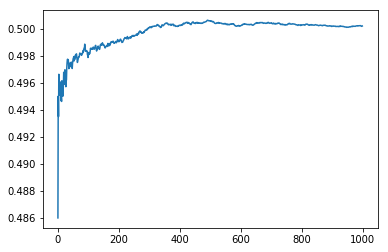

In [9]:
plays = 1000
x = range(0, plays)
experiment = RandomAgentExperiment()
experiment.run()
experiment.avg.shape
handle, = plt.plot(x, experiment.avg)

As expected, it stabilizes around .50 as we are simulating a random response.

### The Value Based Agent Class

A better informed agent can estimate the average reward for each action and choose between selecting known good actions (exploit) or to explore with a small probability $\epsilon$.

Now we create the **ValueBasedAgent class** to represent this better informed agent. What makes this class smarter is the **reward function**, that were not implemented in our original **Agent class**<br/>

**Note**: Like the **RandomAgent**, it also receives the **Agent class** and, as the Agent class receives the **BanditsProblem class**, this new class has full access to all properties and functions to act on the environment. <br/>

It offers three functions:

+ **\__init__** : Used to receive the enviroment (the problem object) and initialize with zeros the internal vector for the number of times each action was selected (n). 
+ **initialize**:  Use to initialize with zeros the internal vector of acummulated reward (q).
+ **reward**: Update n and q. 

The **reward** function implements the following part of out bandit algorithm:
<img src="../images/RL-assign4-14.png" alt="Drawing" style="width: 500px;"/>


## Question 2
Implement the **reward** function for the **ValueBasedAgent class** below.
Consider that:
+ A is the parameter **a**
+ R is the parameter **r**
+ Your vector $N$ is an internal attribute of your class and can be accessed like this: self.n
+ Your vector $Q$ is an internal attribute of your class and can be accessed like this: self.q

In [10]:
class ValueBasedAgent(Agent):

    def __init__(self, problem):
        Agent.__init__(self, problem)
        self.n = np.zeros(self.problem.k) # Number of times each action was selected
        self.initialize()

    def initialize(self, init=0.0): # Average reward for each action
        self.q = np.zeros(self.problem.k) # Average reward for each action
        
    def reward(self, a, r):
        #################
        ### CODE HERE ###
        #################
        self.n[a] = self.n[a] + 1
        self.q[a] = self.q[a] + (1. / self.n[a]) * (r - self.q[a])
        

### The EpsilonGreedyAgent Class

We are going to use our **ValueBasedAgent class** above as our parent class to implement our **EpsilonGreedyAgent Class**.
For that, we pass the **ValueBasedAgent class** as a parameter, and then our new class will have acces to all the previous parent classes capabilities (BanditsProblem, Agent and ValueBasedAgent).

Using the better informed **ValueBasedAgent class**, we will implement the $\epsilon- greedy$ algorithm in our **choose_action**.<br/>

It offers three functions:

+ **\__init__** : Used to receive the enviroment (the problem object) and the epsilon paramater. 
+ **\__str__**:  And interesting special function that is called when you print the object (you can try this!).
+ **choose_action**: Implements the $\epsilon-greedy$ algorithm. 

The **choose_action** function implements the following part of out bandit algorithm:
<img src="../images/RL-assign4-15.png" alt="Drawing" style="width: 500px;"/>


In [11]:
class EpsilonGreedyAgent(ValueBasedAgent):

    def __init__(self, problem, epsilon=0.1):
        self.epsilon = epsilon
        ValueBasedAgent.__init__(self, problem)

    def __str__(self):
        return 'e-greedy, e=%.g' % self.epsilon

    def choose_action(self):
        if np.random.uniform() > self.epsilon:
            return np.argmax(self.q)
        else:
            return np.random.randint(self.problem.k)

### The EpsilonGreedyAgentExperiment Class
The same way we have done for the **RandomAgentExperiment**, let's roughly assess the relative effectiveness of the greedy and ε-greedy methods, we compared them numerically on a suite of test problems. This is a set of 2000 randomly generated k-armed bandit problems with k = 10. We call this suite of test tasks the **10-armed testbed**.
To run these experiments, we are defining the **EpsilonGreedyAgentExperiment  class** below.

It offers two functions:

+ _init_ : Used to pass to the object the parameters received (epsilon, number of plays for each Bandit method tested, number of experiments) and initialize the average reward vector with zeros.
+ run: run the experiment 2000 times by default, for the agent selected (in this case EpsilonGreedyAgent).

In [12]:
class EpsilonGreedyAgentExperiment:

    def __init__(self, epsilon=0.1, plays=1000, num_experiments=2000):
        self.epsilon = epsilon
        self.plays = plays
        self.num_experiments = num_experiments
        self.avg = np.zeros(plays)

    def run(self):
        for i in range(1, self.num_experiments + 1):
            
            problem = BanditsProblem()
            agent = EpsilonGreedyAgent(problem, self.epsilon)
            agent.play(self.plays)
         
            td = np.subtract(agent.rewards(), self.avg) # Temporal difference
            self.avg = np.add(self.avg, td / i)

## Question 3
Different values of $\epsilon$ make a difference in the average performance obtained over time. 
Run the 10-armed testbed experiment defined by **EpsilonGreedyAgentExperiment class**. Try with epsilon = .1, 0.01 and 0 (when using 0, we call it a greedy method).<br/> 

Steps for each epsilon value tested:
+ Instantiate and object **experiment** with the **EpsilonGreedyAgentExperiment class** for 2000 experiments and 1000 plays.
+ Call the function **run()** for this object.
+ Plot the average performance of $\epsilon-greedy$ action-value methods returned (attribute **avg** of the object **experiment**) against the number of plays.
**Note**: These ploted values are averages over 2000 runs with different bandit problems. 
**Optional**: Combine the plots in one figure to better compare the results.


CPU times: user 58.7 s, sys: 7.56 ms, total: 58.7 s
Wall time: 58.7 s


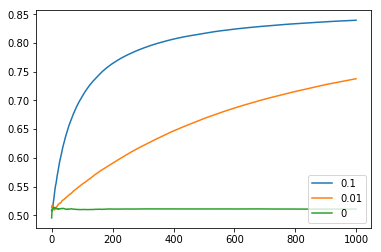

In [13]:
def E_greedy_Experiment():
    #################
    ### CODE HERE ###
    #################
    plays = 1000
    x = range(0, plays)
    handles = []
    for epsilon in [0.1, 0.01, 0]:
        np.random.seed(0)
        experiment = EpsilonGreedyAgentExperiment(epsilon, plays)
        experiment.run()
        handle, = plt.plot(x, experiment.avg, label=epsilon)
        handles.append(handle)
        plt.legend(handles=handles, loc=4)
    #################
    ### CODE ENDS ###
    #################

%time E_greedy_Experiment()

## Question 3 Comments
The plot compares a greedy method with two ε-greedy methods (ε = 0.01 and ε = 0.1). <br/>
All the methods formed their action-value estimates using the sampleaverage technique. The graph shows the increase in expected reward with experience. The greedy method improved slightly faster than the other methods at the very beginning, but then leveled off at
a lower level. The greedy method performed significantly worse in the long run because it often got stuck performing suboptimal actions. 
The ε-greedy methods eventually performed better because they continued to explore and to improve their chances of recognizing the optimal action. The ε = 0.1 method explored more, and usually found the optimal action earlier, but it never selected that action more than 91% of the time. The ε = 0.01 method improved more slowly, but eventually would perform better than the ε = 0.1 method on both performance measures shown in the figure.

### The BiasedEpsilonGreedyAgent Class
Optimistic agents are encouraged to explore more, so initialization of the action function provides us with some opportunities for tuning the agent's initial behavior.

We can compare the performance of both approaches in the experiment below. The realistic agent assumes the initial values are all zeros, while an optimistic agent has all its estimates initialized to +5.
For that, we are defining the **BiasedEpsilonGreedyAgent class** below.

We are going to use our **EpsilonGreedyAgent class** above as a parent class to implement our **BiasedEpsilonGreedyAgent  Class**.
For that, we pass the **EpsilonGreedyAgent class** as a parameter, and then our new class will have acces to all the previous parent classes capabilities (BanditsProblem, Agent and ValueBasedAgent).

It offers two functions:

+ **\_init_** : Used to pass to the object the parameter received (bias) and initialize the **EpsilonGreedyAgent** with the epsilon value received.
+ **initialize**: Use to initialize with the bias value the internal vector of acummulated reward (q).
+ **run**: run the experiment 2000 times by default, for the agent selected (in this case EpsilonGreedyAgent).

In [14]:
class BiasedEpsilonGreedyAgent(EpsilonGreedyAgent):

    def __init__(self, problem, bias=0, epsilon=0.1):
        self.bias = bias
        EpsilonGreedyAgent.__init__(self, problem, epsilon)

    def initialize(self):
        self.q = np.ones(self.problem.k) * self.bias

## Question 4
+ Instantiate two agents objects from the same **BiasedEpsilonGreedyAgent class**, one realistic (action function initialized with zeroes) and another optimistics (action function initialized with 5.0).<br/>
**Tip**: look how we have passed the parameters to the **EpsilonGreedyAgent** when using the function **evaluate**.
+ print the attribute **q** of each object to confirm that it have worked.


In [15]:
#################
### CODE HERE ###
#################
realistic = BiasedEpsilonGreedyAgent(problem)
optimistic = BiasedEpsilonGreedyAgent(problem, 5)

print("realistic q initialvalues: {}".format(realistic.q))
print("optimistic q initial values: {}".format(optimistic.q))


realistic q initialvalues: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
optimistic q initial values: [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


Below we have a **AgentBiasExperiment class** that is pretty similar to the previous **AgentExperiment class**.
Actually, the only difference is that, instead of receiving only the epsilon parameter, this class receives the **param** tuple with (bias, epsilon). 

In [16]:
class AgentBiasExperiment:

    def __init__(self, params, plays=1000, num_experiments=2000):
        self.params = params
        self.plays = plays
        self.num_experiments = num_experiments
        self.avg = np.zeros(plays)

    def run(self):
        for i in range(1, self.num_experiments + 1):
            problem = BanditsProblem()
            bias, epsilon = self.params
            agent = BiasedEpsilonGreedyAgent(problem, bias, epsilon)
            agent.play(self.plays)
            td = np.subtract(agent.optimal_choices_avg(), self.avg) # Optimal action %
            self.avg = np.add(self.avg, td / i)

Different initialization values for the action function make a difference in the average performance obtained over time. 

Run the 10-armed testbed experiment defined by **AgentBiasExperiment class** below. We are passing two tuples for (bias, epsilon): (0,0.1) and (5, 0.1).<br/> 

CPU times: user 39.8 s, sys: 7.94 ms, total: 39.8 s
Wall time: 39.8 s


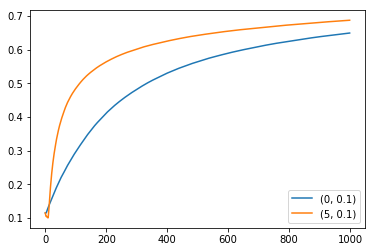

In [17]:
def BiasExperiment():
    plays = 1000
    x = range(0, plays)
    handles = []
    for params in [(0, 0.1), (5, 0.1)]:
        np.random.seed(0)
        experiment = AgentBiasExperiment(params, plays)
        experiment.run()
        handle, = plt.plot(x, experiment.avg, label=params)
        handles.append(handle)
        
        plt.legend(handles=handles, loc=4)
    
%time BiasExperiment()

## Question 4 Comments
The plot shows the performance on the 10-armed bandit testbed of a optimistic greedy method using Q1(a) = +5, for all a. For comparison, also shown is an realistic ε-greedy method with Q1(a) = 0. <br/>
Initially, the optimistic method performs worse because it explores more, but eventually it performs better because its exploration decreases with time. We call this technique for encouraging exploration optimistic initial values. We regard it as a simple trick that can be quite effective on stationary problems, but it is far from being a generally useful approach to encouraging exploration. 

### Upper-Confidence-Bound Action Selection

Exploration is needed because there is always uncertainty about the accuracy of the action-value estimates. The greedy actions are those that look best at present, but some of the other actions may actually be better. ε-greedy action selection forces the non-greedy actions to be tried, but indiscriminately, with no preference for those that are nearly greedy or particularly uncertain. <br/>
It would be better to select among the non-greedy actions according to their potential for actually being optimal, taking into account both how close their estimates are to being maximal and the uncertainties in those estimates. <br/>
One effective way of doing this is to select actions according to

$$A_t = \textrm{arg} \max_a \left[Q_t(a) + c \sqrt{\frac{\log t}{N_t(a)}} \right]$$

+ $N_t(a)$ denotes the number of times that action a has been selected prior to time
t
+ c > 0 controls the degree of exploration. 

### The UcbAgent Class
This class will implement an UCB agent, taking into account the uncertainty of estimates about actions being optimal.

We are going to use our **ValueBasedAgent class** as a parent class to implement our **BiasedEpsilonGreedyAgent  Class**, as we have done with the **EpsilonGreedyAgent class**  previously.
For that, we pass the **EpsilonGreedyAgent class** as a parameter, and then our new class will have acces to all the previous parent classes capabilities (BanditsProblem, Agent and ValueBasedAgent).

It offers four functions:

+ **\_init_** : Used to pass to the object the parameter received (c) and initialize the time step (t).

+ **run**: run the experiment 2000 times by default, for the agent selected (in this case EpsilonGreedyAgent).
+ **\__str__**:  And interesting special function that is called when you print the object (you can try this!).
+ **choose_action**: Implements the UCB action selection equation.
+ **reward**: Implements the reward function from the parent **ValueBasedAgent class**.

In [18]:
class UcbAgent(ValueBasedAgent):

    def __init__(self, problem, c=1):
        ValueBasedAgent.__init__(self, problem)
        self.t = 0
        self.c = c  # the confidence value

    def __str__(self):
        return 'UCB, c=%.g' % self.c

    def choose_action(self):
        
        uneval = np.where(self.n == 0)[0]
        if uneval.size == 0:
            #################
            ### CODE HERE ###
            #################
            numerator = np.log(self.t)
            estimates = self.q + self.c * np.sqrt(np.divide(numerator, self.n))
            best_action =  np.argmax(estimates)
            #################
            ### CODE ENDS ###
            #################
            
            return best_action
        else:
            return uneval[0]

    def reward(self, a, r):
        ValueBasedAgent.reward(self, a, r)
        self.t = self.t + 1

## Question 5
Implement the UCB action equation above into the **choose_action** function of the **UcbAgent class** below.
Consider that:
+ A is the parameter **a**
+ R is the parameter **r**
+ Your vector $N_t$ is an internal attribute of your class and can be accessed like this: self.n
+ Your vector $Q_t$ is an internal attribute of your class and can be accessed like this: self.q
+ Your degree of exploration $c$ is an internal attribute of your class and can be accessed like this: self.c

## Conclusion
As a final exercise, we willplot the accumulated rewards (the **agent.rewards** function returns the accumulated rewards for each 1.000 plays) for the following agents:
+ UcbAgent, using a confidence interval = 0.5.
+ UcbAgent, using the default confidence interval = 1.
+ UcbAgent, using a confidence interval = 2.
+ EpsilonGreedyAgent, using epsilon = 0.1


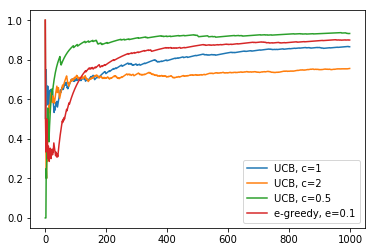

In [19]:
num_turns = 1000
x = range(0, num_turns)
handles = []
np.random.seed(1)
for agent in [UcbAgent(problem), UcbAgent(problem, 2), 
              UcbAgent(problem, 0.5), EpsilonGreedyAgent(problem, 0.1)]:
    agent.play(num_turns)
    handle, = plt.plot(x, agent.rewards(), label=str(agent))
    handles.append(handle)
_ = plt.legend(handles=handles, loc=4)

## Question 5 Comments
Depending of the degree of exploration c chosen, UCB often performs well,as shown here, but is more difficult than ε-greedy to extend beyond bandits to the more general reinforcement learning settings considered in the rest of this book. 